In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("D:\Model all\Machine-Learning\Datasets\customer_churn_dataset-testing-master.csv")

In [3]:
df = pd.read_csv("D:\Model all\Machine-Learning\Datasets\customer_churn_dataset-training-master.csv")

In [4]:
df.dropna(axis = 0, inplace=True)
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
Usage Frequency      0
Support Calls        0
Payment Delay        0
Subscription Type    0
Contract Length      0
Total Spend          0
Last Interaction     0
Churn                0
dtype: int64

In [5]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [6]:
df["Contract Length"].value_counts()

Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64

In [7]:
df.dtypes 

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [8]:
df.select_dtypes("object").columns

Index(['Gender', 'Subscription Type', 'Contract Length'], dtype='object')

In [9]:
category = ['Gender', 'Subscription Type', 'Contract Length']

# Model Preprocessing

In [10]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [11]:
encoder = LabelEncoder()

In [12]:
df["Gender"] = encoder.fit_transform(df["Gender"])
df["Subscription Type"] = encoder.fit_transform(df["Subscription Type"])
df["Contract Length"] = encoder.fit_transform(df["Contract Length"])

In [13]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,0,39.0,14.0,5.0,18.0,2,0,932.0,17.0,1.0
1,3.0,65.0,0,49.0,1.0,10.0,8.0,0,1,557.0,6.0,1.0
2,4.0,55.0,0,14.0,4.0,6.0,18.0,0,2,185.0,3.0,1.0
3,5.0,58.0,1,38.0,21.0,7.0,7.0,2,1,396.0,29.0,1.0
4,6.0,23.0,1,32.0,20.0,5.0,8.0,0,1,617.0,20.0,1.0


# using the standard scaller for the Total Spend columna


In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaller = StandardScaler()

In [16]:
df["Total Spend"] = scaller.fit_transform(df[["Total Spend"]])

In [17]:
df.drop("CustomerID", axis = 1,inplace = True)

In [18]:
df[["Age", "Tenure", "Usage Frequency","Payment Delay","Last Interaction"]]
newlist = ["Age", "Tenure", "Usage Frequency","Payment Delay","Last Interaction"]

In [19]:
df[newlist] = scaller.fit_transform(df[newlist])

In [20]:
X = df.iloc[:,:-1]

In [21]:
Y = df.iloc[:,-1]

** Traning and testign data sets **

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, random_state=42, test_size=0.2)

# building the model

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
Lmodel = LogisticRegression()

In [27]:
Lmodel.fit(x_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [28]:
Lmodel.score(x_test,y_test)

0.8504769358149875

# Decign Tree Model 

In [29]:
Dmodel = DecisionTreeClassifier()

In [30]:
Dmodel.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [31]:
Dmodel.score(x_test,y_test)

0.9998298683180782

# RandomForest Model

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
Rmodel = RandomForestClassifier()

In [34]:
Rmodel.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [35]:
from sklearn.tree import plot_tree

In [36]:
model = Dmodel

In [37]:
model

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# model Evaluation 

In [38]:
# Cross validation

In [39]:
from sklearn.model_selection import cross_validate

In [40]:
scores = cross_validate(model,X,Y,cv = 5)

In [41]:
scores

{'fit_time': array([4.22492313, 4.91070652, 3.80983901, 3.01978278, 2.76641583]),
 'score_time': array([0.04613066, 0.04472446, 0.0311954 , 0.02843595, 0.03705859]),
 'test_score': array([0.99979584, 0.99984121, 0.99985255, 0.99979584, 0.99989792])}

In [42]:
print(f"Mean Score: {np.mean(scores['test_score']):.4f}")

# Calculate the standard deviation (Stability)
# A low value here means your model is consistent across different data samples
print(f"Score Stability (Std Dev): {np.std(scores['test_score']):.6f}")

Mean Score: 0.9998
Score Stability (Std Dev): 0.000038


In [43]:
# checking the model overfit or underfit

In [44]:
train_sco = model.score(x_train,y_train)
test_sco = model.score(x_test,y_test)

In [45]:
train_sco,test_sco

(1.0, 0.9998298683180782)

In [46]:
train_scores = cross_validate(model,X,Y,cv = 5)
test_scores = cross_validate(model,X,Y,cv = 5 , return_train_score=True)
test_scores

{'fit_time': array([2.90300512, 3.11022568, 3.02689314, 2.87189889, 2.9221046 ]),
 'score_time': array([0.03812313, 0.03878593, 0.03305697, 0.04902172, 0.02680206]),
 'test_score': array([0.99979584, 0.99981853, 0.99985255, 0.99979584, 0.99988658]),
 'train_score': array([1., 1., 1., 1., 1.])}

In [47]:
print("Train score average :", test_scores["train_score"].mean())
print("Test score average :", test_scores["test_score"].mean())

Train score average : 1.0
Test score average : 0.9998298672631893


# main model

In [48]:
model = DecisionTreeClassifier(max_depth=5, class_weight='balanced')

In [49]:
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [50]:
trainscore = model.score(x_train,y_train)
testscore = model.score(x_test,y_test)


In [51]:
trainscore,testscore

(0.9548892007996257, 0.9540417616568557)

In [52]:
score_train = cross_validate(model,X,Y, cv = 5, )
score_test = cross_validate(model,X,Y, cv = 5, return_train_score=True)

In [53]:
print("Train Score",score_train["test_score"].mean())
print("Test Score",score_test["test_score"].mean())

Train Score 0.9547038354733421
Test Score 0.9547015670509167


In [54]:
if score_train["test_score"].mean() < score_test["test_score"].mean():
    print(score_test)

# confusion matrix check

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [56]:
y_pred = model.predict(x_test)

In [57]:
cm = confusion_matrix(y_test,y_pred)

In [58]:
y_pred_probs = model.predict_proba(x_test)[:, 1]
y_pred_new = (y_pred_probs > 0.3).astype(int) 

In [59]:
cm

array([[38061,     2],
       [ 4050, 46054]])

<Axes: >

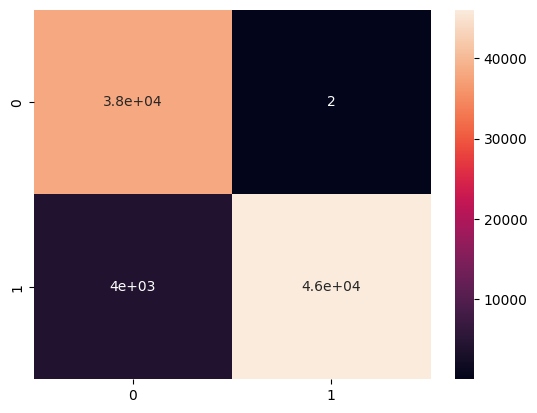

In [60]:
sns.heatmap(cm, annot=True)

In [61]:
y_pred_new = (model.predict_proba(x_test)[:,1] > 0.3).astype(int)

In [62]:
y_pred_new

array([1, 1, 1, ..., 0, 1, 0], shape=(88167,))

In [63]:
from sklearn.metrics import accuracy_score, precision_score,f1_score,recall_score

In [64]:
accuracy_score(y_test,y_pred_new)

0.9540417616568557

In [65]:
precision_score(y_test,y_pred_new)

0.9999565746048289

In [66]:
recall_score(y_test,y_pred_new)

0.9191681302889989

In [67]:
f1_score(y_test,y_pred_new)

0.9578618968386023

In [68]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:,1])
print(f"ROC-AUC Score: {roc_auc}")

ROC-AUC Score: 0.9668073810305057


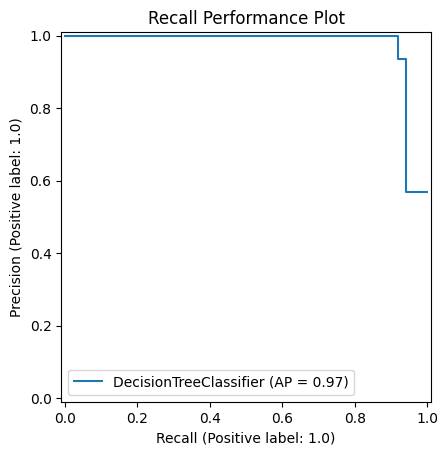

In [69]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

# X_test: your test features, y_test: actual answers, model: your trained ML model
PrecisionRecallDisplay.from_estimator(model, x_test, y_test)
plt.title("Recall Performance Plot")
plt.show()


In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95     38063
         1.0       1.00      0.92      0.96     50104

    accuracy                           0.95     88167
   macro avg       0.95      0.96      0.95     88167
weighted avg       0.96      0.95      0.95     88167



### building the Pipelines for the model work good in this 

In [71]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [72]:
DecisionTreeClassifier()

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [73]:
data = {
    "model__max_depth":[3,5,10],
    "model__min_samples_split":[2,3,5], 
    "model__criterion":['gini', 'entropy', 'log_loss']
}

In [74]:
grid_search = GridSearchCV(
    estimator = model,
    param_grid = data,
    cv = 5
)

In [75]:
from sklearn.compose import ColumnTransformer

In [76]:
df.head() # list1 = 
# list2 = 
# dont do any thing 
# list3 = ["Support Calls", ""]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,-0.753326,0,0.448760,-0.210511,5.0,0.609620,2,0,1.247427,0.293052,1.0
1,2.059646,0,1.028278,-1.724562,10.0,-0.601319,0,1,-0.309865,-0.986584,1.0
2,1.255940,0,-1.000036,-1.375166,6.0,0.609620,0,2,-1.854698,-1.335575,1.0
3,1.497051,1,0.390808,0.604748,7.0,-0.722413,2,1,-0.978462,1.689018,1.0
4,-1.315921,1,0.043097,0.488282,5.0,-0.601319,0,1,-0.060698,0.642043,1.0


In [77]:
category = ["Gender", "Subscription Type", "Contract Length"]
scaller = ["Age","Tenure","Usage Frequency", "Payment Delay", "Total Spend","Last Interaction"]
normal = ["Support Calls"]

In [78]:
preprocesser = ColumnTransformer(
   transformers = [
       ("cat", OneHotEncoder(), category),
       ("scaller", StandardScaler(), scaller),
       ("normal", "passthrough",normal)
   ]
)

In [79]:
preprocesser

,transformers,"[('cat', ...), ('scaller', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,None
,sparse_output,True


In [80]:
data

{'model__max_depth': [3, 5, 10],
 'model__min_samples_split': [2, 3, 5],
 'model__criterion': ['gini', 'entropy', 'log_loss']}

In [81]:
pipe = Pipeline(
    [
        ("preprocess", preprocesser),
        ("model", DecisionTreeClassifier())
    ]
)

In [82]:
pipe

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('scaller', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [83]:
gread_search = GridSearchCV(
    estimator=pipe,
    param_grid=data,
    cv = 5
)

In [84]:
data

{'model__max_depth': [3, 5, 10],
 'model__min_samples_split': [2, 3, 5],
 'model__criterion': ['gini', 'entropy', 'log_loss']}

In [85]:
X

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,-0.753326,0,0.448760,-0.210511,5.0,0.609620,2,0,1.247427,0.293052
1,2.059646,0,1.028278,-1.724562,10.0,-0.601319,0,1,-0.309865,-0.986584
2,1.255940,0,-1.000036,-1.375166,6.0,0.609620,0,2,-1.854698,-1.335575
3,1.497051,1,0.390808,0.604748,7.0,-0.722413,2,1,-0.978462,1.689018
4,-1.315921,1,0.043097,0.488282,5.0,-0.601319,0,1,-0.060698,0.642043
...,...,...,...,...,...,...,...,...,...,...
440828,0.211121,1,1.318037,-0.094045,1.0,-1.206788,1,0,0.352005,-0.753923
440829,-1.155179,0,-1.347747,-0.326976,1.0,0.851808,1,0,0.472436,-1.451906
440830,-1.074809,1,0.216952,1.303541,1.0,-0.964600,2,2,1.435589,-0.637592
440831,-0.914068,1,1.375989,-0.210511,2.0,-1.570070,2,2,-0.120706,-1.451906


In [86]:
from sklearn.model_selection import RandomizedSearchCV

random_search = RandomizedSearchCV(
    estimator=pipe, 
    param_distributions=data, 
    n_iter=10,  # Try just 10 random combinations
    cv=3,       # Reduce folds to 3
    verbose=2,
    n_jobs=-1   # Use all CPU cores
)
random_search.fit(X, Y)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


,estimator,Pipeline(step...lassifier())])
,param_distributions,"{'model__criterion': ['gini', 'entropy', ...], 'model__max_depth': [3, 5, ...], 'model__min_samples_split': [2, 3, ...]}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [87]:
random_search.best_params_

{'model__min_samples_split': 2,
 'model__max_depth': 10,
 'model__criterion': 'log_loss'}

In [88]:
model = random_search.best_estimator_

In [89]:
model.score(x_test,y_test)

0.9972098404164823

In [90]:
model.score(x_train,y_train)


0.9974451675102435

In [91]:
cross_validate(model, X,Y,cv = 5)

{'fit_time': array([2.37842679, 2.04169273, 2.15988541, 1.96398401, 2.22824693]),
 'score_time': array([0.05845118, 0.054667  , 0.05074906, 0.06418538, 0.0720613 ]),
 'test_score': array([0.99751608, 0.99726655, 0.99755008, 0.99734592, 0.99752739])}

In [92]:
cross_validate(model,X,Y,cv = 5 , return_train_score=True)


{'fit_time': array([2.07085586, 2.27100492, 2.43409109, 2.92084241, 2.3937695 ]),
 'score_time': array([0.0558095 , 0.07770634, 0.06846333, 0.07817698, 0.12484026]),
 'test_score': array([0.99751608, 0.99725521, 0.99755008, 0.99733457, 0.99752739]),
 'train_score': array([0.99736294, 0.99741681, 0.99735444, 0.99740264, 0.99745368])}

In [93]:
# use model

In [94]:
# first develope the model 
# model , then compare the model
#  

Model import

In [95]:
import joblib

In [96]:
load = joblib.dump(model, "decision.pkl")

# Testing the model 

In [97]:
model

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('scaller', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [98]:
newdf = pd.read_csv("D:\Model all\Machine-Learning\Datasets\customer_churn_dataset-testing-master.csv")

In [99]:
newdf = newdf.iloc[:,1:-1]

In [100]:
X = newdf

In [101]:
newdf.iloc[0:1]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,22,Female,25,14,4,27,Basic,Monthly,598,9


In [102]:
# resatrt to build the app 


In [103]:
model = DecisionTreeClassifier(class_weight="balanced", max_depth=5)

In [104]:
model.fit(x_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [146]:
newdf

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,22,Female,25,14,4,27,Basic,Monthly,598,9
1,41,Female,28,28,7,13,Standard,Monthly,584,20
2,47,Male,27,10,2,29,Premium,Annual,757,21
3,35,Male,9,12,5,17,Premium,Quarterly,232,18
4,53,Female,58,24,9,2,Standard,Annual,533,18
...,...,...,...,...,...,...,...,...,...,...
64369,45,Female,33,12,6,21,Basic,Quarterly,947,14
64370,37,Male,6,1,5,22,Standard,Annual,923,9
64371,25,Male,39,14,8,30,Premium,Monthly,327,20
64372,50,Female,18,19,7,22,Standard,Monthly,540,13


In [105]:
model.score(x_test,y_test)

0.9540417616568557

In [106]:
category,scaller,normal

(['Gender', 'Subscription Type', 'Contract Length'],
 ['Age',
  'Tenure',
  'Usage Frequency',
  'Payment Delay',
  'Total Spend',
  'Last Interaction'],
 ['Support Calls'])

In [107]:
newdf.iloc[0:1]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,22,Female,25,14,4,27,Basic,Monthly,598,9


In [108]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [109]:
categoryOrdinal = category[1:]
category[0]

'Gender'

In [116]:
category = ["Subscription Type", "Contract Length"]
category2 = ["Gender"]
scaller = ["Age","Tenure","Usage Frequency", "Payment Delay", "Total Spend","Last Interaction"]
normal = ["Support Calls"]

In [138]:
preprocesser = ColumnTransformer(
    transformers = [
    ("cat", OneHotEncoder(drop='first'), category2),
        ("catOrd",OrdinalEncoder(), category),
        ("scaler", StandardScaler(),scaller),
        ("normal", "passthrough",normal)
    ]
)

In [139]:
preprocesser

,transformers,"[('cat', ...), ('catOrd', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [147]:
preprocesser.fit(newdf)

,transformers,"[('cat', ...), ('catOrd', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [149]:
data1 = preprocesser.fit_transform(newdf) 

In [150]:
data1

array([[ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00, ...,
         2.18407687e-01, -7.52323771e-01,  4.00000000e+00],
       [ 0.00000000e+00,  2.00000000e+00,  1.00000000e+00, ...,
         1.64741682e-01,  5.21064734e-01,  7.00000000e+00],
       [ 1.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         8.27900169e-01,  6.36827325e-01,  2.00000000e+00],
       ...,
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
        -8.20412834e-01,  5.21064734e-01,  8.00000000e+00],
       [ 0.00000000e+00,  2.00000000e+00,  1.00000000e+00, ...,
        -3.92290446e-03, -2.89273405e-01,  7.00000000e+00],
       [ 0.00000000e+00,  2.00000000e+00,  1.00000000e+00, ...,
         5.94069720e-01,  7.52589916e-01,  9.00000000e+00]],
      shape=(64374, 10))

In [142]:
x_test.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Subscription Type', 'Contract Length', 'Total Spend',
       'Last Interaction'],
      dtype='object')

In [151]:
pd.DataFrame(data1, columns=x_test.columns)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction
0,0.0,0.0,1.0,-1.434202,-0.409100,-0.122526,1.114538,0.218408,-0.752324,4.0
1,0.0,2.0,1.0,-0.069730,-0.233642,1.465424,-0.467000,0.164742,0.521065,7.0
2,1.0,1.0,0.0,0.361155,-0.292128,-0.576225,1.340472,0.827900,0.636827,2.0
3,1.0,1.0,2.0,-0.500616,-1.344876,-0.349375,-0.015132,-1.184575,0.289540,5.0
4,0.0,2.0,0.0,0.792041,1.520939,1.011724,-1.709637,-0.030756,0.289540,9.0
...,...,...,...,...,...,...,...,...,...,...
64369,0.0,0.0,2.0,0.217527,0.058789,-0.349375,0.436736,1.556225,-0.173511,6.0
64370,1.0,2.0,0.0,-0.356988,-1.520334,-1.597050,0.549703,1.464226,-0.752324,5.0
64371,1.0,1.0,1.0,-1.218759,0.409705,-0.122526,1.453439,-0.820413,0.521065,8.0
64372,0.0,2.0,1.0,0.576598,-0.818502,0.444599,0.549703,-0.003923,-0.289273,7.0


In [153]:
df

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,-0.753326,0,0.448760,-0.210511,5.0,0.609620,2,0,1.247427,0.293052,1.0
1,2.059646,0,1.028278,-1.724562,10.0,-0.601319,0,1,-0.309865,-0.986584,1.0
2,1.255940,0,-1.000036,-1.375166,6.0,0.609620,0,2,-1.854698,-1.335575,1.0
3,1.497051,1,0.390808,0.604748,7.0,-0.722413,2,1,-0.978462,1.689018,1.0
4,-1.315921,1,0.043097,0.488282,5.0,-0.601319,0,1,-0.060698,0.642043,1.0
...,...,...,...,...,...,...,...,...,...,...,...
440828,0.211121,1,1.318037,-0.094045,1.0,-1.206788,1,0,0.352005,-0.753923,0.0
440829,-1.155179,0,-1.347747,-0.326976,1.0,0.851808,1,0,0.472436,-1.451906,0.0
440830,-1.074809,1,0.216952,1.303541,1.0,-0.964600,2,2,1.435589,-0.637592,0.0
440831,-0.914068,1,1.375989,-0.210511,2.0,-1.570070,2,2,-0.120706,-1.451906,0.0


In [ ]:
model

In [112]:
pipe = Pipeline(
    [
        ("preprocess",preprocesser),
        ("model", DecisionTreeClassifier(max_depth=5, class_weight="balanced"))
    ]
)

In [113]:
pipe

,steps,"[('preprocess', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('catOrd', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


Model Building From scrach

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, RandomizedSearchCV

In [160]:
df = pd.read_csv("D:\Model all\Machine-Learning\Datasets\customer_churn_dataset-training-master.csv")

In [262]:
df.dropna(axis=0, inplace=True)

In [264]:
X = df.iloc[:,1:-1]
y = df[["Churn"]]

In [265]:
category1 = ["Gender"]
category2 = ["Subscription Type","Contract Length"]

In [266]:
numerical_cols = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay',
       'Total Spend', 'Last Interaction']


In [267]:
catrgory2

['Subscription Type', 'Contract Length']

In [268]:
preprocesser = ColumnTransformer(
    transformers = [
        ("cat", OneHotEncoder(drop="first"), category1),
        ("cat2",OrdinalEncoder(), catrgory2),
        ("scaller", StandardScaler(), numerical_cols)
    ]
)

In [269]:
preprocesser

,transformers,"[('cat', ...), ('cat2', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,categories,'auto'
,drop,'first'
,sparse_output,True


In [270]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [271]:
data = preprocesser.fit_transform(x_test)

In [272]:
cat_01 = preprocesser.named_transformers_["cat"].get_feature_names_out(category1)


In [273]:
all_features = list(cat_01) + category2 + numerical_cols

In [274]:
pd.DataFrame(data,columns=all_features)

,Gender_Male,Subscription Type,Contract Length,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction
0,0.0,1.0,2.0,-1.319258,-1.227430,0.024064,1.431454,0.368871,-0.177702,-0.175518
1,1.0,0.0,2.0,-0.515543,-1.632305,0.490268,-1.176809,1.095217,-1.969630,-0.291866
2,0.0,2.0,0.0,-0.997772,1.491016,-1.491098,-1.176809,1.337332,1.177677,1.337017
3,0.0,0.0,0.0,-0.354800,-0.186323,0.839921,0.453355,0.005698,-1.237892,1.686064
4,1.0,0.0,0.0,-0.917400,1.259659,1.655778,-0.524743,-0.962763,-0.261436,0.057180
...,...,...,...,...,...,...,...,...,...,...
88162,1.0,0.0,2.0,-0.033314,1.491016,1.422676,-0.850776,0.853101,1.331425,-1.106308
88163,0.0,2.0,2.0,-0.676286,1.664533,-0.791792,1.757487,0.247813,-0.177702,1.220668
88164,1.0,1.0,2.0,-1.319258,0.276391,0.140615,-0.524743,-1.204878,-0.044409,-0.059169
88165,0.0,1.0,0.0,1.815231,1.317498,0.723370,1.431454,0.489929,1.098683,-0.640913


In [347]:
pipe = Pipeline(
     [
        ("preprocessor", preprocesser),
        ("model", RandomForestClassifier(
    min_samples_split=8,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=9,
    criterion='entropy',
    random_state=42,
    class_weight='balanced'
))
     ]
)

In [348]:
y.isnull().sum()

Churn    0
dtype: int64

In [349]:
pipe.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('cat2', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [350]:
y_predict = pipe.predict(x_test)

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     38063
         1.0       1.00      0.98      0.99     50104

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167



In [351]:
pipe.score(x_test,y_test)

0.9900643097757664

In [352]:
test_data = {
    'Age': 35,
    'Gender': 'Male',
    'Tenure': 24,
    'Usage Frequency': 15,
    'Support Calls': 3,
    'Payment Delay': 10,
    'Subscription Type': 'Premium',
    'Contract Length': 'Annual',
    'Total Spend': 750,
    'Last Interaction': 15
}

In [353]:
x_test01 = pd.DataFrame([test_data])

In [354]:
pipe.predict(x_test01)

array([0.])

In [355]:
pipe

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('cat2', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [356]:
# hyper_parameter = {
#     "model__max_depth": [3, 5, 7, 9],
#     "model__min_samples_split": [2, 4, 6, 8],
#     "model__min_samples_leaf": [1, 2, 3, 4],
#     "model__max_features": ["auto", "sqrt", "log2"],
#     "model__criterion": ["gini", "entropy"],
# }

In [357]:
pipe.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('cat', ...), ('cat2', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [358]:
pipe.score(x_test,y_test)

0.9900643097757664

In [359]:
# {'model__min_samples_split': 8,
#  'model__min_samples_leaf': 1,
#  'model__max_features': 'sqrt',
#  'model__max_depth': 9,
#  'model__criterion': 'entropy'}

In [360]:
y_predict = pipe.predict(x_test)

In [361]:
confusion_matrix(y_test,y_predict)

array([[38061,     2],
       [  874, 49230]])

In [362]:
import joblib

In [ ]:
joblib.dump()

In [367]:
joblib.load("rf_model.pkl")

AttributeError: Can't get attribute '_RemainderColsList' on <module 'sklearn.compose._column_transformer' from 'C:\\Users\\samay\\AppData\\Roaming\\Python\\Python313\\site-packages\\sklearn\\compose\\_column_transformer.py'>

In [365]:
# Check your current version
import sklearn
print(f"Current scikit-learn version: {sklearn.__version__}")

# If you know the version used to save the model, install it:
# pip install scikit-learn==1.3.0  # Replace with the correct version

Current scikit-learn version: 1.7.1


In [2]:
import sklearn
import pandas
print(f"scikit-learn version: {sklearn.__version__}")
print(f"pandas version: {pandas.__version__}")

scikit-learn version: 1.7.1
pandas version: 2.3.1
